# Lending Club Case Study

The project can be divided into four steps:
1. Data Understanding
2. Data Cleaning
3. Data analysis: 
   a)Univariate 
   b)Segmented Univariate
   c)Bivariate analysis
4. Recommendations

It takes 1 to 1.5min to execute the complete file. 

## Step1 : Data Understanding 


In [94]:
#Importing the modules that are necessary  
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [95]:
#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format

#Increasing the maximum number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [96]:
#Get the current working directory 
cwd = os.getcwd()
print(cwd)
# Place the downloaded loan.csv in your current working directory
filepath=cwd+'/loan.csv'

/Users/poojaravishankar/Documents/LendingClub_8thDec


In [97]:
#Read the data set
data = pd.read_csv(filepath,low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [98]:
data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.00,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.00,0.00,13,0,7274,13.10%,40,f,0.00,0.00,2822.97,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,nan,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.00,0.00,6,0,8847,26.90%,9,f,0.00,0.00,9913.49,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,nan,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
39714,90395,90390,5000,5000,1325.00,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.00,0.00,11,0,9698,19.40%,20,f,0.00,0.00,5272.16,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,nan,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.00,0.00,17,0,85607,0.70%,26,f,0.00,0.00,5174.20,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,nan,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan

In [99]:
data.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
30218,501039,643798,15000,15000,15000.00,36 months,11.36%,493.67,B,B5,Pittsburgh Public Theater,3 years,MORTGAGE,45000.00,Verified,May-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 05/04/10 > I will use this...,debt_consolidation,EHS 2010 Lending Club,152xx,PA,20.27,0,Oct-00,0,nan,nan,14,0,5794,57.90%,30,f,0.00,0.00,17772.63,17772.63,15000.00,2772.63,0.00,0.00,0.00,May-13,529.11,NaN,Jan-15,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


In [100]:
#Display the number of rows and columns 
data.shape

(39717, 111)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [102]:
# Displaying the columns of the dataframe
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [103]:
# Statistical info 
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,0.00,39717.00,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0

In [104]:
# Display datatype of all the columns 
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

## Step 2 : Data Cleaning 

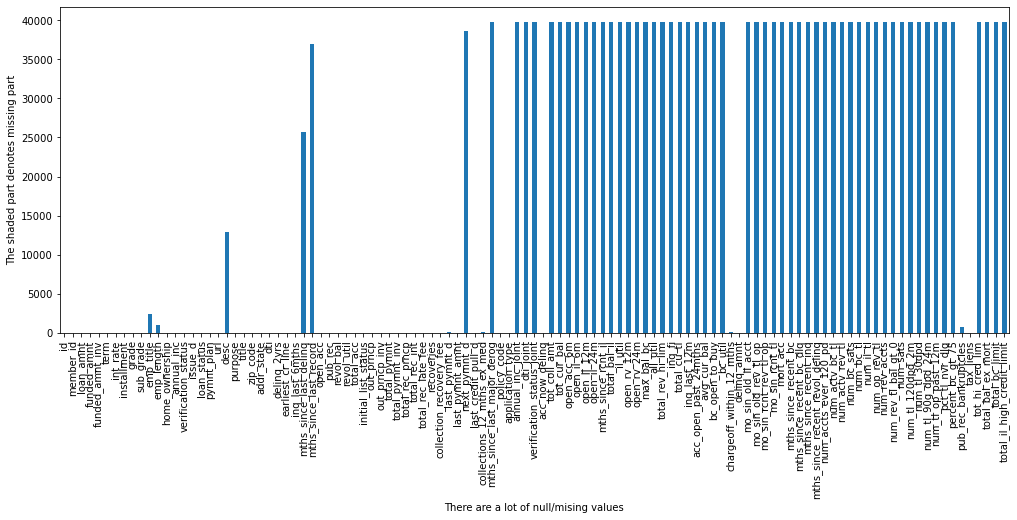

In [105]:
# Missing/null values part in the chart
plt.figure(figsize=(17, 6))
data.isnull().sum().plot(kind='bar')
plt.xlabel("There are a lot of null/mising values")
plt.ylabel("The shaded part denotes missing part")
plt.show()

In [106]:
#Calculate the percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64

In [107]:
# Fetch those columns having more than 90% missing values
missing_columns = data.columns[100*(data.isnull().sum()/len(data.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [108]:
#Display columns which have more than 0% missing values
null_perc[ null_perc > 0 ]

emp_title                          6.19
emp_length                         2.71
desc                              32.58
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


In [109]:
# Dropping the columns having more than 90% missing values
data = data.drop(missing_columns, axis=1)
print(data.shape)


(39717, 55)


In [110]:
# Recompute the percentage of missing values 
print(100*(data.isnull().sum()/len(data.index)))

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_deli

In [111]:
# Two columns are having approx 32 and 64% missing values namely description and months since last delinquent
data.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,nan
1,Borrower added on 12/22/11 > I plan to use t...,nan
2,NaN,nan
3,Borrower added on 12/21/11 > to pay for prop...,35.00
4,Borrower added on 12/21/11 > I plan on combi...,38.00


The 'months since last delinquent' represents the number months passed since the person last fell into the 90 DPD group. It is not avaliable at the time of applying for the loan. It is generated once the loan is approved. Hence dropping this column.


The desc column is of string data type and it contains the comments the applicant had written while applying for the loan. Since we are not interested in doing Text analytics. We are dropping this column

In [112]:
# Dropping the two columns
data = data.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [113]:
# Compute the percentage of missing values again
100*(data.isnull().sum()/len(data.index))

id                           0.00
member_id                    0.00
loan_amnt                    0.00
funded_amnt                  0.00
funded_amnt_inv              0.00
term                         0.00
int_rate                     0.00
installment                  0.00
grade                        0.00
sub_grade                    0.00
emp_title                    6.19
emp_length                   2.71
home_ownership               0.00
annual_inc                   0.00
verification_status          0.00
issue_d                      0.00
loan_status                  0.00
pymnt_plan                   0.00
url                          0.00
purpose                      0.00
title                        0.03
zip_code                     0.00
addr_state                   0.00
dti                          0.00
delinq_2yrs                  0.00
earliest_cr_line             0.00
inq_last_6mths               0.00
open_acc                     0.00
pub_rec                      0.00
revol_bal     

Checking rows with large number of missing values

In [114]:
# Missing values in the rows
data.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [115]:
# The data is looking clean by and large. 
#Check if the columns are in the right format
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [116]:
#Strip '%' value
data['int_rate'] = data.int_rate.str.strip('%').astype(float)
print(data['int_rate'].dtypes)
data['int_rate'].head()

float64


0   10.65
1   15.27
2   15.96
3   13.49
4   12.69
Name: int_rate, dtype: float64

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [118]:
# Drop the missing values from the emp_length
data = data[~data['emp_length'].isnull()]

In [119]:
# Extracting the numeric values from the string
import re
data['emp_length'] = data['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# Converting to numeric type
data['emp_length'] = data['emp_length'].apply(lambda x: pd.to_numeric(x))

In [120]:
# Checking the data type of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

## Step 3: Data Analysis

The objective is to identify driver variables of default

Lets broadly classify into three types of variables - 
1. Demographic variables such as age, occupation, employment details, those which are related to the applicant 
2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.) 
3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Customer behaviour variables are not available at the time of loan application, and thus they cannot be used. 
Thus, going forward, we will use only the other two types of variables.


In [121]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [122]:
#Drop all the customer behavior variables
data=data.drop(behaviour_var, axis=1)

In [123]:
# The variables zip code, address, state are not used , The variable 'title' is derived from the variable 'purpose',Drop all the unnecessary variables( Non driver variables)
data = data.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [124]:
#Displaying the columns
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [125]:
#Check the shape 
data.shape

(38642, 28)

In [126]:
#Checking the info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [127]:
# Check the value counts of each category in loan_status
data['loan_status'] = data['loan_status'].astype('category')
data['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

Next, let's have a look at the target variable - loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.The ones marked 'current' are neither fully paid not defaulted, so let's get rid of the current loans.

In [128]:
# drop loan_status which are Current
data = data[data['loan_status'] != 'Current']
data['loan_status'] = data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [129]:
# Converting loan_status to integer type
data['loan_status'] = data['loan_status'].apply(lambda x: pd.to_numeric(x))
data['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

## Step 3a: Univariate Analysis

In [130]:
# Display the default rate
print(100*round(np.mean(data['loan_status']), 2))

14.000000000000002


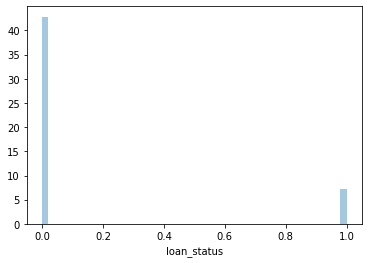

In [131]:
#Distribution plot for loan status :0 : Fully paid and 1 : Charged off (also called defaulted)
sns.distplot(data.loan_status)
plt.show()

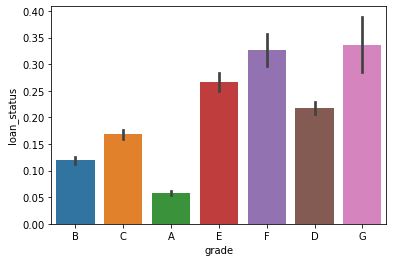

In [132]:
# Plot default rates across the Grade of the loan status
sns.barplot(x='grade', y='loan_status', data=data)
plt.show()

Grade G has higher defaut rates compared to other grades. 
We can observe as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan. 

In [133]:
# Plot loan_status across the different categorical variables
def plot_category(category_var):
    sns.barplot(x=category_var, y='loan_status', data=data)
    plt.show()


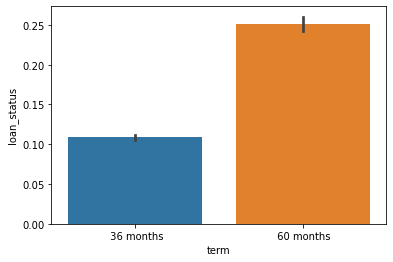

In [134]:
plot_category('term')

60 months loans default more than 36 months loans

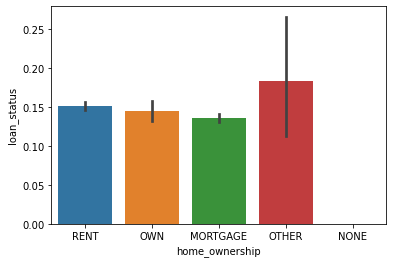

In [135]:
# default rate across the home ownership
plot_category('home_ownership')

Other category has higher default rate compared to others

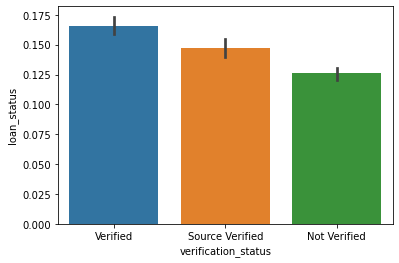

In [136]:
# Default rate across the verification_status
plot_category('verification_status')

Surprisingly, verified loans default more than not verified

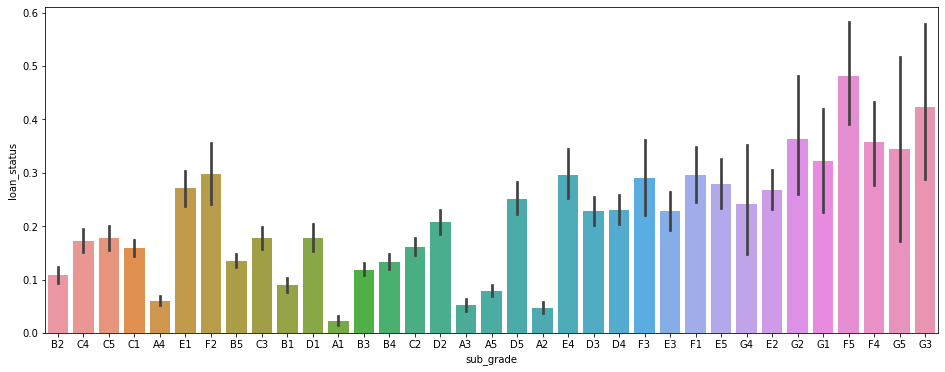

In [137]:
# default rate across the sub-grade
plt.figure(figsize=(16, 6))
plot_category('sub_grade')

A1 is better (deafults less than A2) than A2 better than A3 and so on 

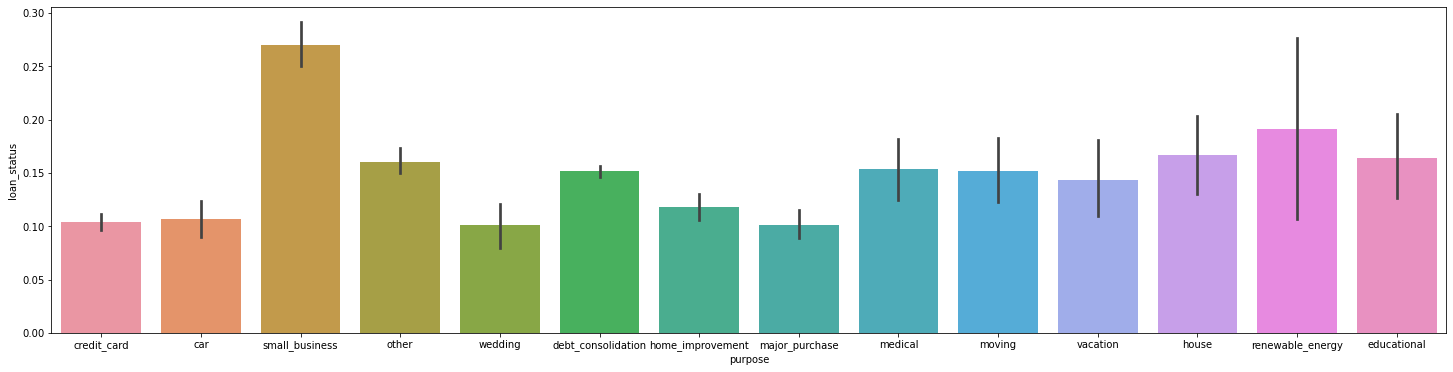

In [138]:
#  default rate across the purpose
plt.figure(figsize=(25, 6))
plot_category('purpose')

small business loans default the most, then renewable energy and education

In [139]:
# distribution of loans across years
data['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [140]:
#Converting the year column into datetime
from datetime import datetime
data['issue_d'] = data['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

# Extract month and year from issue_date
data['month'] = data['issue_d'].apply(lambda x: x.month)
data['year'] = data['issue_d'].apply(lambda x: x.year)

data.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

 The number of loans has increased steadily across years

In [141]:
# The number of loans across the different months
data.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

Most loans are granted in December, and in general in the latter half of the year.

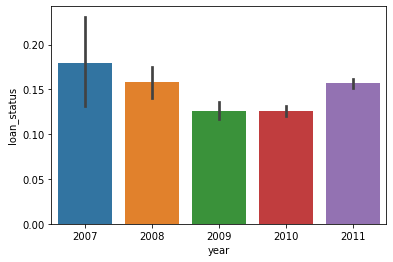

In [142]:
# Displaying the default rates across years
plot_category('year')

Default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010

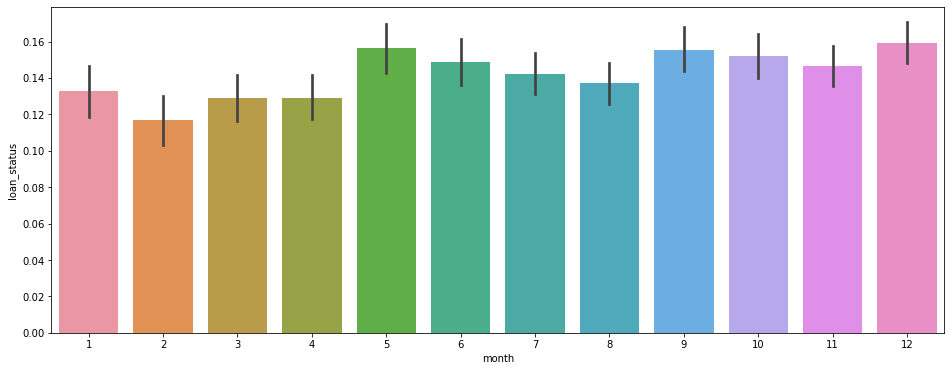

In [143]:
# Display the default rates across months
plt.figure(figsize=(16, 6))
plot_category('month')

 Not much variation across months

### Analysing the default rate across continuous variables 

In [144]:
# Bin loan amount into low, medium, high, very high.
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
data['loan_amnt_c'] = data['loan_amnt'].apply(lambda x: loan_amount(x))
data['loan_amnt_c'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt_c, dtype: int64

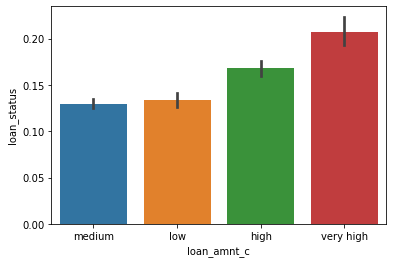

In [145]:
# Display the default rates across loan amount types
plot_category('loan_amnt_c')

Higher the loan amount, higher the default rate

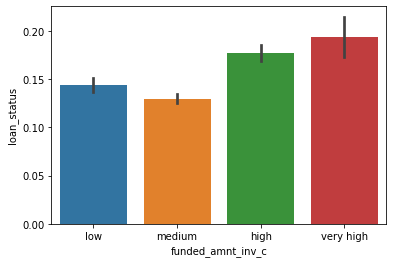

In [146]:
data['funded_amnt_inv_c'] = data['funded_amnt_inv'].apply(lambda x: loan_amount(x))
# Plot the default rate across different funded amount invested types
plot_category('funded_amnt_inv_c')

Higher the funded amount invested, higher the default rate

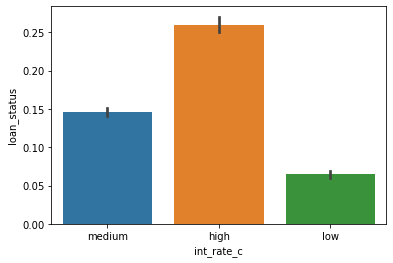

In [147]:
# Bin the interest rate to low, medium, high
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
data['int_rate_c'] = data['int_rate'].apply(lambda x: int_rate(x))
# Plot default rates across rates of interest 
plot_category('int_rate_c')

 High interest rates default more, as expected

In [148]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    
data['dti_c'] = data['dti'].apply(lambda x: dti(x))

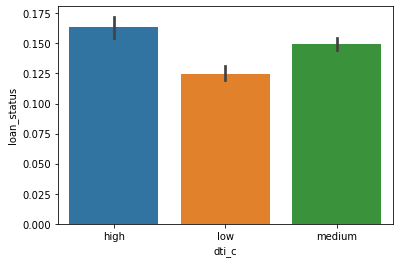

In [149]:
# Plot default rates across debt to income ratio
plot_category('dti_c')

Observation : high dti translates into higher default rates, as expected

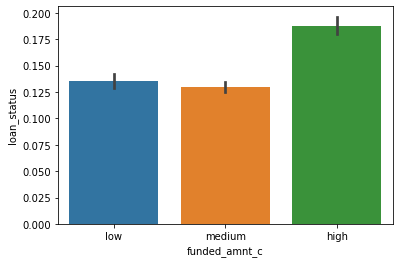

In [150]:
# Bin the Funded amount into low, medium and high
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
data['funded_amnt_c'] = data['funded_amnt'].apply(lambda x: funded_amount(x))
#Display default rate across the funded amount category types
plot_category('funded_amnt_c')

 Higher the funded amount, higher the default rate

In [151]:
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
data['installment_c'] = data['installment'].apply(lambda x: installment(x))

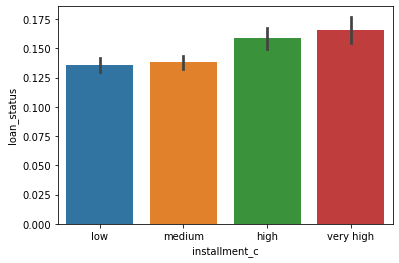

In [152]:
# Display default rates across installment categories
plot_category('installment_c')

The higher the installment amount, the higher the default rate

In [153]:
# Bin the annual income into low, medium, high and very high 
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

data['annual_inc_c'] = data['annual_inc'].apply(lambda x: annual_income(x))

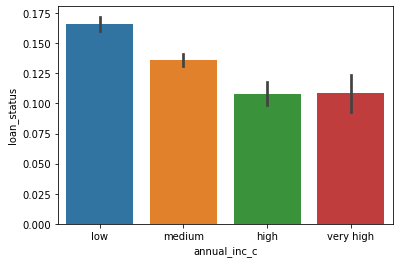

In [154]:
# Display default rate across annual incomes types
plot_category('annual_inc_c')

 lower the annual income, higher the default rate

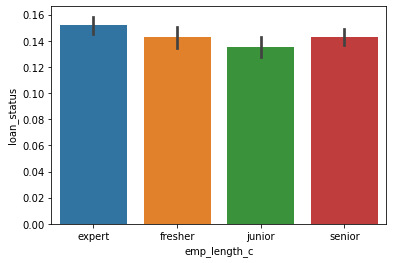

In [155]:
# Bin the emp_length into Fresher, juinor, Senior and Expert 
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

data['emp_length_c'] = data['emp_length'].apply(lambda x: emp_length(x))
# Display default rate across various emp_length types
plot_category('emp_length_c')

 Not much of a predictor of default

##  Step 3b : Segmented Univariate Analysis


Observing how the default rates  varies across the different types of purposes of the loan.

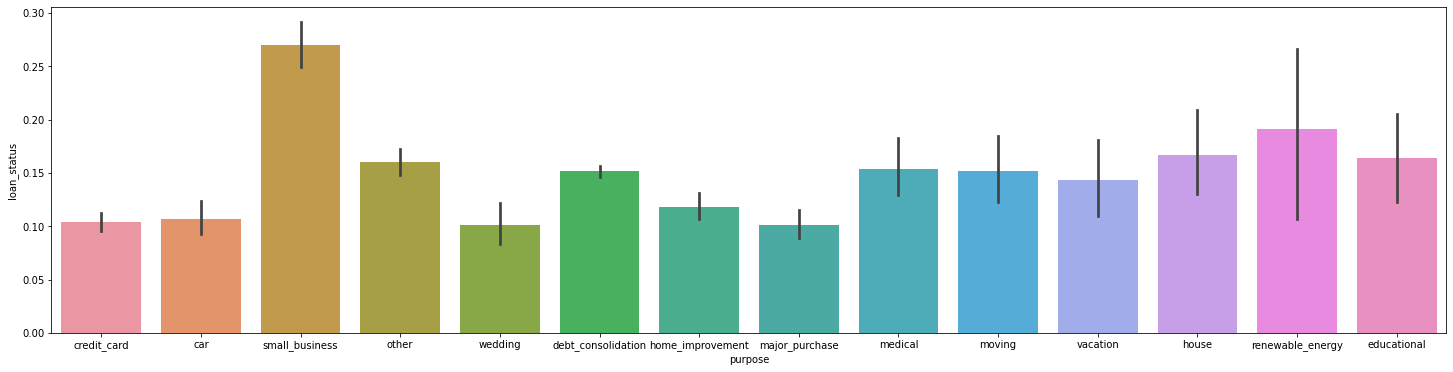

In [156]:
# Display the default rate across differnt types of purpose 
plt.figure(figsize=(25, 6))
plot_category('purpose')

Small business loans default the most, then renewable energy and education

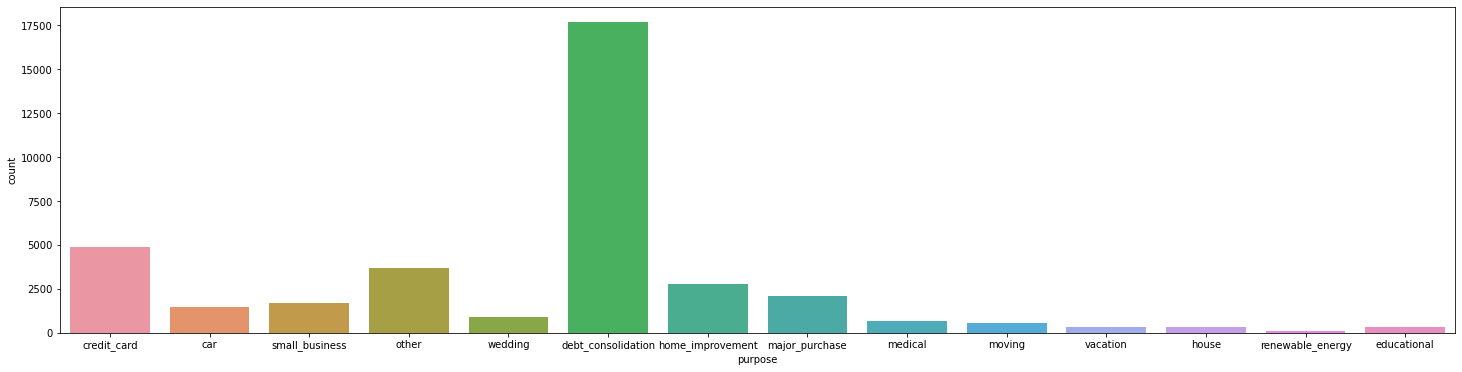

In [157]:
# Observing the distribution of loans for each purpose type
plt.figure(figsize=(25, 6))
sns.countplot(x='purpose', data=data)
plt.show()

Most loans are debt consolidation then credit card etc.

Analysing the debt consolidation, credit card, home improvement and major purchase.

In [158]:
# Fetch the data frame for the purposes of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
data = data[data['purpose'].isin(main_purposes)]
data['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

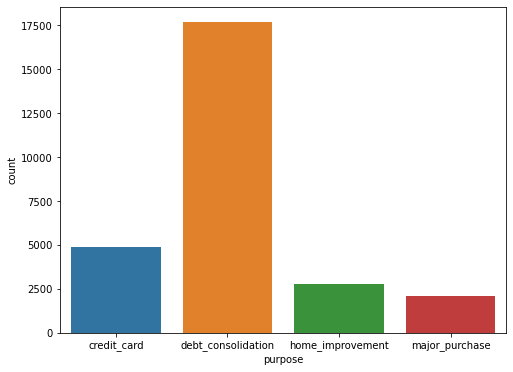

In [159]:
# Display the distribution of the top 4 purpose types of loans
plt.figure(figsize=(8, 6))
sns.countplot(x=data['purpose'])
plt.show()

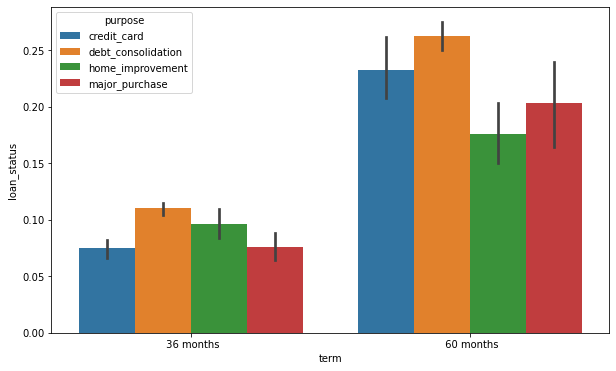

In [160]:
# Define a function which accepts a categorical variable and plots the default rate, segmented by purpose 
def plot_segmentedvar(category_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_var, y='loan_status', hue='purpose', data=data)
    plt.show()

#Display default rate scross term segmented by purpose
plot_segmentedvar('term')   

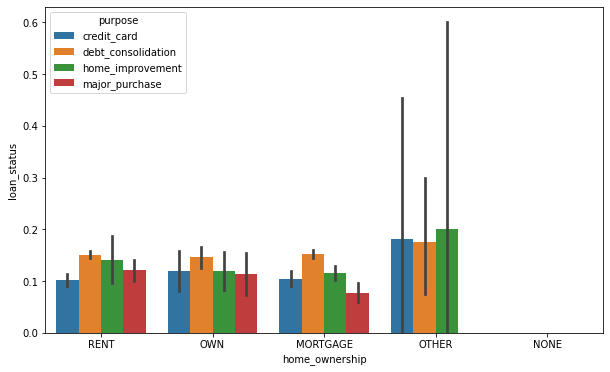

In [161]:
#Display default rate scross home_ownership segmented by purpose
plot_segmentedvar('home_ownership')

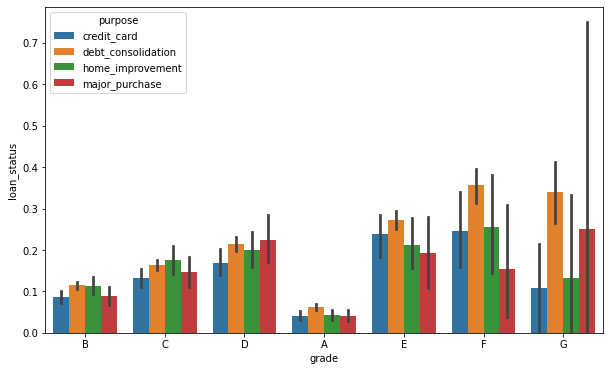

In [162]:
# Display default rate scross grade types segmented by purpose
plot_segmentedvar('grade')

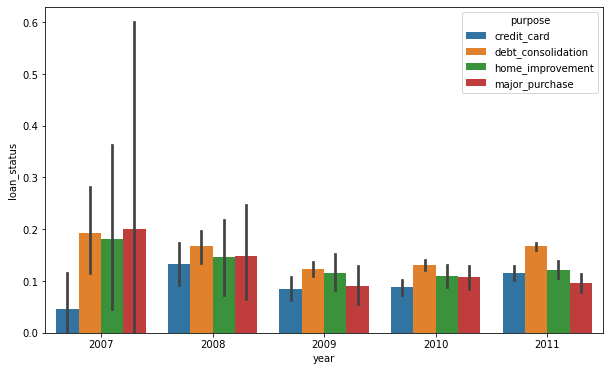

In [163]:
# Plot default rate scross year segmented by purpose
plot_segmentedvar('year')

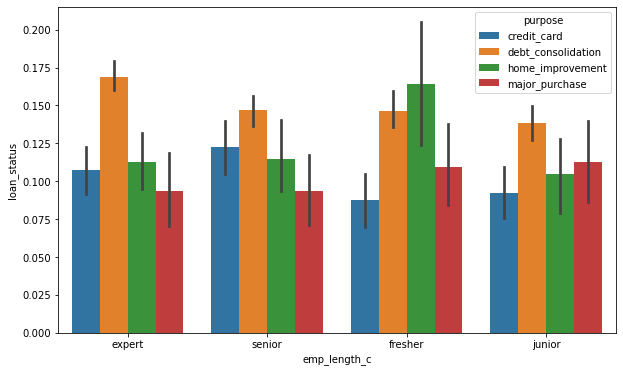

In [164]:
# Display default rate scross emp_lenth categories segmented by purpose
plot_segmentedvar('emp_length_c')

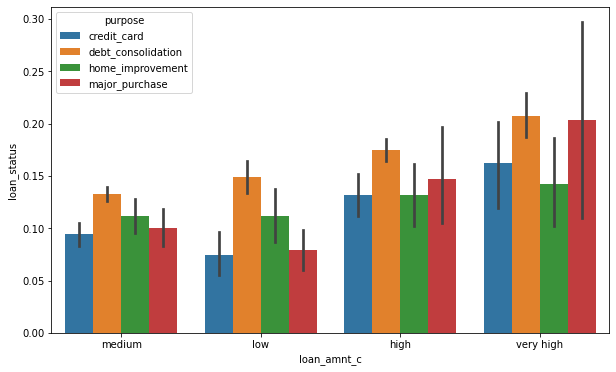

In [165]:
#Display default rate scross loan amount categories segmented by purpose 
plot_segmentedvar('loan_amnt_c')

 In general, debt consolidation loans have the highest default rates

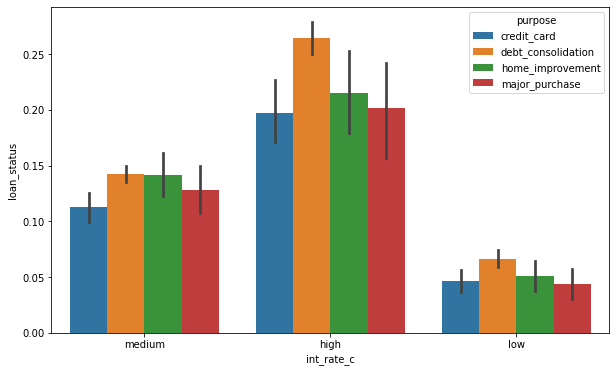

In [166]:
# Display default rate scross interest rate categories segmented by purpose
plot_segmentedvar('int_rate_c')

 In general, debt consolidation loans have the highest default rates

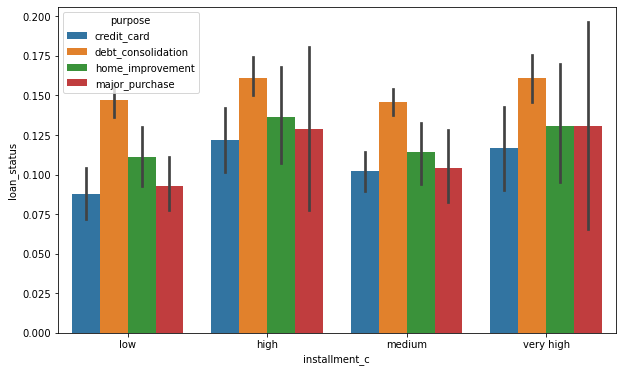

In [167]:
# Display default rate scross installment categories segmented by purpose
plot_segmentedvar('installment_c')

 In general, debt consolidation loans have the highest default rates

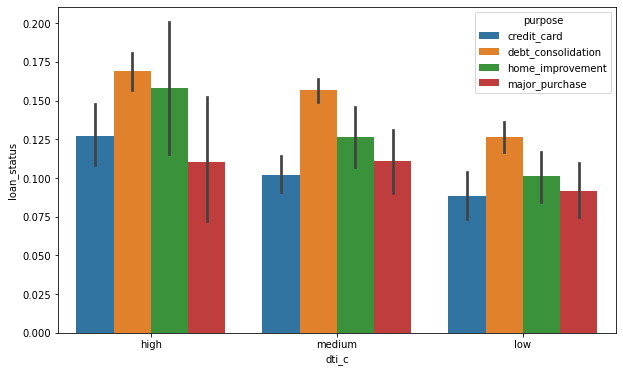

In [168]:
# Display default rate scross dti categories segmented by purpose
plot_segmentedvar('dti_c')

In general, debt consolidation loans have the highest default rates

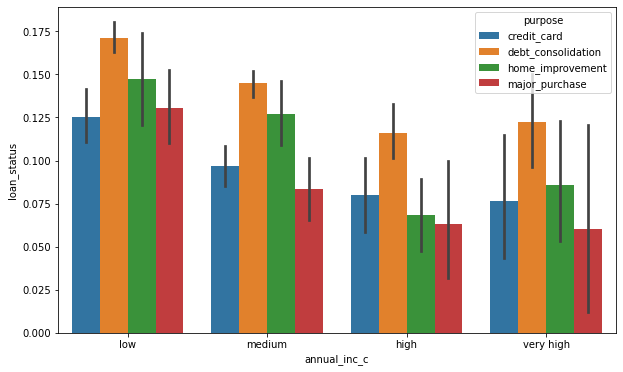

In [169]:
# Display default rate scross annual income categories segmented by purpose
plot_segmentedvar('annual_inc_c')

 In general, debt consolidation loans have the highest default rates

## Step 3c : Bivariate Analysis 

In [170]:
#Create a function for storing numeric and object data type columns into two separate lists
dtype_obj=[]
dtype_numeric=[]
for i in data.columns:
        if data[i].describe().dtype==object:
            dtype_obj.append(i)
        elif data[i].describe().dtype==float or  data[i].describe().dtype==int:
            dtype_numeric.append(i)

#Delete those columns with very less values from the numeric data type list
dtype_numeric.remove('tax_liens')
dtype_numeric.remove('delinq_amnt')
dtype_numeric.remove('chargeoff_within_12_mths')
dtype_numeric.remove('acc_now_delinq')
dtype_numeric.remove('policy_code')
dtype_numeric.remove('collections_12_mths_ex_med')


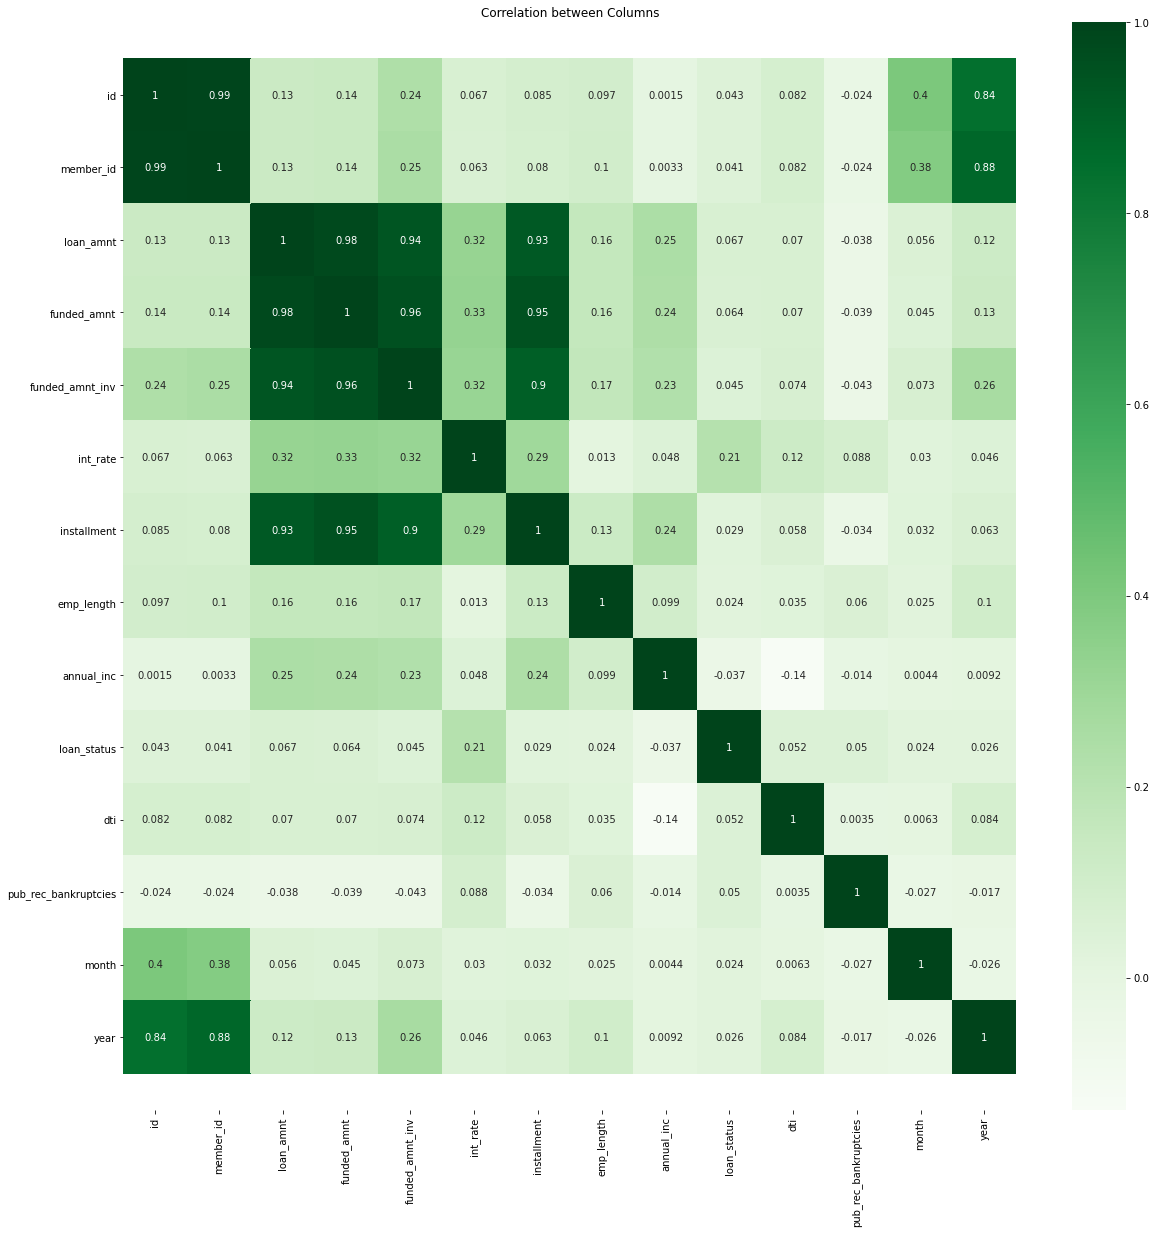

In [171]:
#Finding correlation matrix
corr_matrix = data[dtype_numeric].corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Greens')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

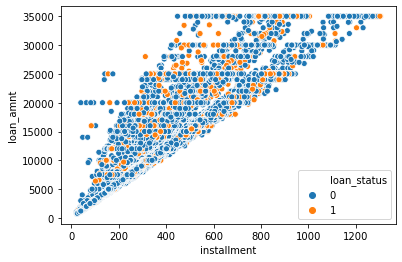

In [172]:
#  loan amt vs installment
sns.scatterplot(data = data, x = "installment", y = "loan_amnt", hue='loan_status')
plt.show()

loan amt and installment are positively correlated

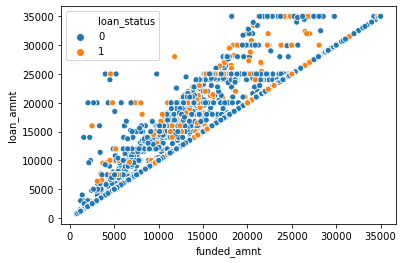

In [173]:
#  loan amt vs funded_amnt
sns.scatterplot(data = data, x = "funded_amnt", y = "loan_amnt", hue='loan_status')
plt.show()

loan amt and funded amount are positively correlated

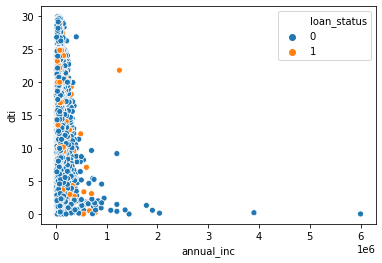

In [174]:
#  dti vs annual_inc
sns.scatterplot(data = data, x = "annual_inc", y = "dti", hue='loan_status')
plt.show()

dti and annual_inc are not correlated 

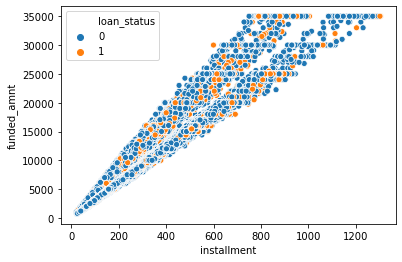

In [175]:
#  funded_amnt vs installment
sns.scatterplot(data = data, x = "installment", y = "funded_amnt", hue='loan_status')
plt.show()

funded_amnt and installment are positively correlated

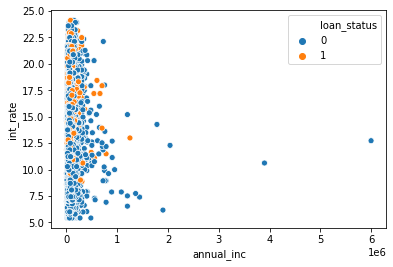

In [176]:
#  int_rate vs annual_inc
sns.scatterplot(data = data, x = "annual_inc", y = "int_rate", hue='loan_status')
plt.show()

int_rate and annual_inc are not correlated

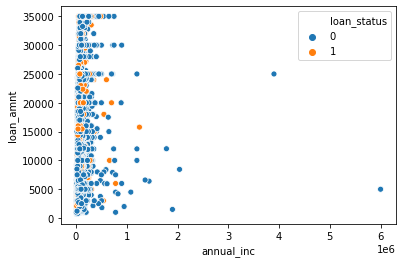

In [177]:
# loan amt vs annual income
sns.scatterplot(data = data, x = "annual_inc", y = "loan_amnt", hue='loan_status')
plt.show()

loan amt and  annual income are not correlated (neutral)

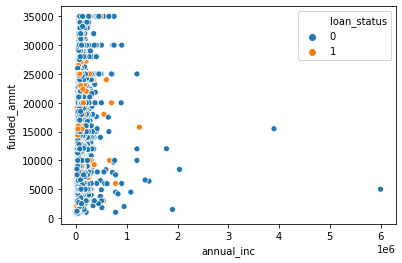

In [178]:
#  funded_amnt vs annual_inc
sns.scatterplot(data = data, x = "annual_inc", y = "funded_amnt", hue='loan_status')
plt.show()

 funded_amnt and annual_inc are not correlated (neutral)

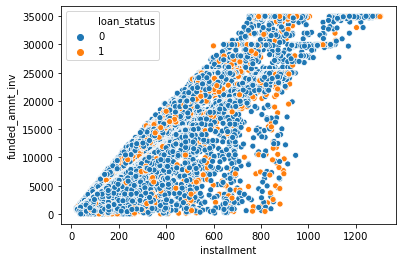

In [179]:
#  funded_amnt_inv vs installment
sns.scatterplot(data = data, x = "installment", y = "funded_amnt_inv", hue='loan_status')
plt.show()

 funded_amnt_inv and installment are positively correlated 

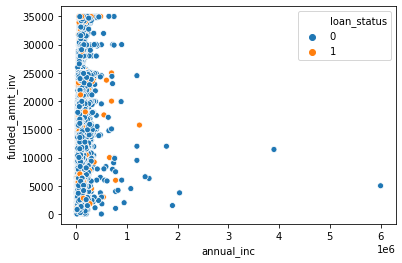

In [180]:
#  funded_amnt_inv vs annual_inc
sns.scatterplot(data = data, x = "annual_inc", y = "funded_amnt_inv", hue='loan_status')
plt.show()

 funded_amnt_inv and annual_inc are not correlated (neutral)

## Step 4 : Recommendations

Recommending the Top 5 predictors which affects the default rate the most.

In [181]:
data.groupby('annual_inc_c').loan_status.mean().sort_values(ascending=False)

annual_inc_c
low         0.16
medium      0.13
very high   0.10
high        0.10
Name: loan_status, dtype: float64

In [182]:
#Define a function that accepts a categorical variable and finds out the  default rate (average)across the categories 
def diff_rate(cat_var):
    default_rates = data.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

#Calculate the 'difference between the highest and the lowest default rate across the categories 
default_rates, diff = diff_rate('annual_inc_c')
print(default_rates) 
print(diff)

annual_inc_c
low         0.16
medium      0.13
very high   0.10
high        0.10
Name: loan_status, dtype: float64
0.06


Thus, there is a 6% increase in default rate as you go from high to low annual income. 

In [183]:
# Filter the object type variables
data_categorical = data.loc[:, data.dtypes == object]
data_categorical['loan_status'] = data['loan_status']

In [184]:
#The difference of default rates for each column is computed and stored in a dictionary
d = {key: diff_rate(key)[1]*100 for key in data_categorical.columns if key != 'loan_status'}


In [185]:
print(d)

{'term': 15.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_title': 100.0, 'home_ownership': 16.0, 'verification_status': 4.0, 'pymnt_plan': 0.0, 'purpose': 5.0, 'initial_list_status': 0.0, 'loan_amnt_c': 7.000000000000001, 'funded_amnt_inv_c': 6.0, 'int_rate_c': 19.0, 'dti_c': 5.0, 'funded_amnt_c': 5.0, 'installment_c': 3.0, 'annual_inc_c': 6.0, 'emp_length_c': 2.0}


In [186]:
#Recommending the Top 5 driver variables/predictors that affect the default rate the most to the management
results=[]
for i in range(5):
    max_key = max(d, key=d.get)
    results.append(max_key)
    d.pop(max_key)

print(results)

['emp_title', 'sub_grade', 'grade', 'int_rate_c', 'home_ownership']
